In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from math import sqrt
from datetime import datetime,timedelta
import datetime,os

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
from matplotlib import pyplot
from pickle import load
from numpy import *
from pandas import *

In [ ]:
X_train = np.load("X_train.npy", allow_pickle=True)
Y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
Y_test = np.load("y_test.npy", allow_pickle=True)
Yc_train = np.load("yc_train.npy", allow_pickle=True)
Yc_test = np.load("yc_test.npy", allow_pickle=True)

In [ ]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = Y_train.shape[1]
print(input_dim)
print(feature_size)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

17
53


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
118/118 [==============================] - 4s 13ms/step - loss: 0.1787 - val_loss: 0.1225
Epoch 2/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0507 - val_loss: 0.0198
Epoch 3/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0186 - val_loss: 0.0144
Epoch 4/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0095 - val_loss: 0.0204
Epoch 5/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0103 - val_loss: 0.0412
Epoch 6/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0091 - val_loss: 0.0104
Epoch 7/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 8/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0031 - val_loss: 0.0108
Epoch 9/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 10/150
118/118 [==============================] - 1s 8ms/step - loss: 0.0029 - val_l

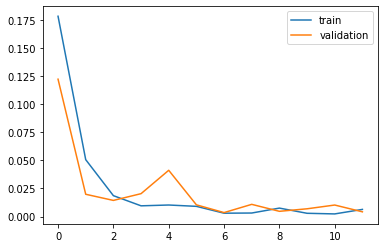

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units= 448), input_shape=( X_train.shape[1], X_train.shape[2])))
model.add(Dense(64,activation='tanh'))
model.add(Dense(units=output_dim))
model.compile(optimizer=Adam(lr = 0.001), loss='mse')
path = "logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)
history = model.fit(X_train, Y_train, epochs=150,validation_data=(X_test, Y_test),
                        verbose=1, shuffle=False, callbacks=[stop_early])

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
Y_hat = model.predict(X_test, verbose=1)
rmse = sqrt(mean_squared_error(Y_test, Y_hat))
mse = mean_squared_error(Y_test, Y_hat)
print(mse)
print(rmse)

51/51 [==============================] - 1s 3ms/step
0.004182102446597969
0.0646691769438731


In [ ]:
X_scaler = load(open('X_scaler.pkl', 'rb'), allow_pickle=True)
y_scaler = load(open('Y_scaler.pkl', 'rb'), allow_pickle=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
Y_test_rescale = y_scaler.inverse_transform(Y_test)
Y_pred_rescale1 = y_scaler.inverse_transform(Y_hat)

In [ ]:
test_predict_index = np.load("index_test.npy", allow_pickle=True)
Y_plot2 = pd.DataFrame(Y_test_rescale, columns = ['GS_close'], index = test_predict_index)
Y_plot3 = pd.DataFrame(Y_pred_rescale1, columns = ['GS_pred'], index = test_predict_index)

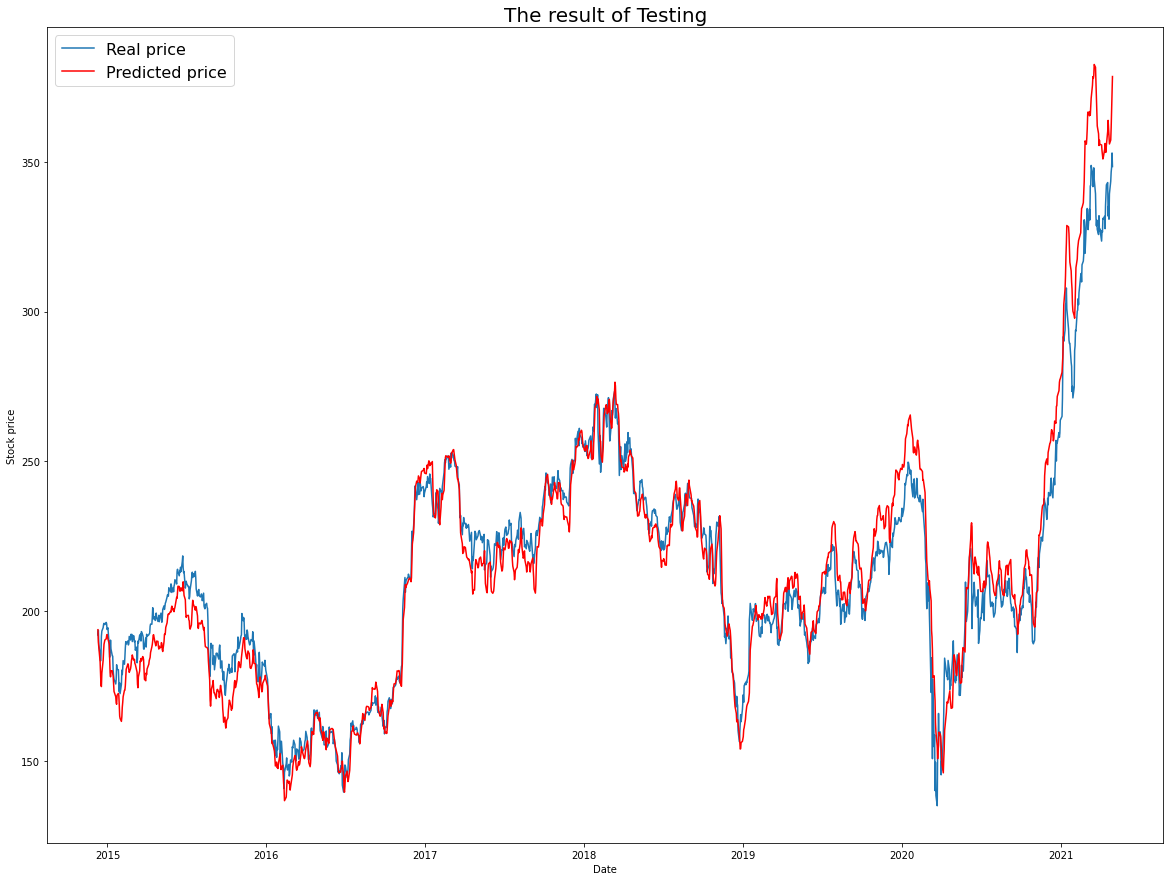

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(Y_plot2["GS_close"])
plt.plot(Y_plot3["GS_pred"], color='r')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Testing", fontsize=20)
plt.show()

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 896)               1799168   
_________________________________________________________________
dense_14 (Dense)             (None, 64)                57408     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 1,856,641
Trainable params: 1,856,641
Non-trainable params: 0
_________________________________________________________________
